<a href="https://colab.research.google.com/github/TheLiss/mlcourse_notebooks/blob/main/mlcourse_demo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
DATA_PATH = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/'

In [ ]:
df = pd.read_csv(DATA_PATH + 'credit_scoring_sample.csv', sep=';')

In [ ]:
df.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [ ]:
df.fillna('median', inplace=True)

<ipython-input-41-c1cbd1e3a4de>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'median' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('median', inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45063 entries, 0 to 45062
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      45063 non-null  int64  
 1   age                                   45063 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  45063 non-null  int64  
 3   DebtRatio                             45063 non-null  float64
 4   NumberOfTimes90DaysLate               45063 non-null  int64  
 5   NumberOfTime60-89DaysPastDueNotWorse  45063 non-null  int64  
 6   MonthlyIncome                         45063 non-null  object 
 7   NumberOfDependents                    45063 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 2.8+ MB


In [ ]:
def data_distribution(col):
  sns.barplot(df[col].value_counts())
  plt.xticks(np.arange(0, df[col].max(), 10))


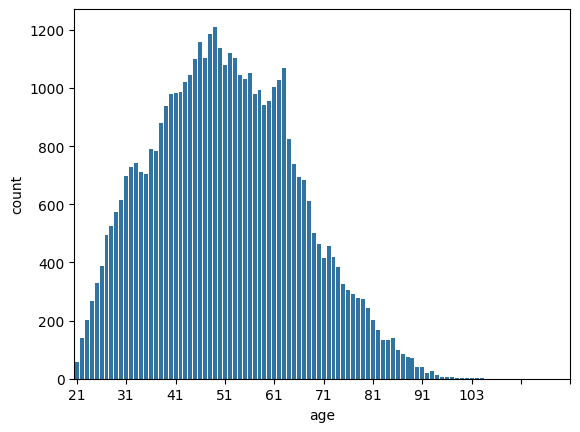

In [ ]:
data_distribution('age')

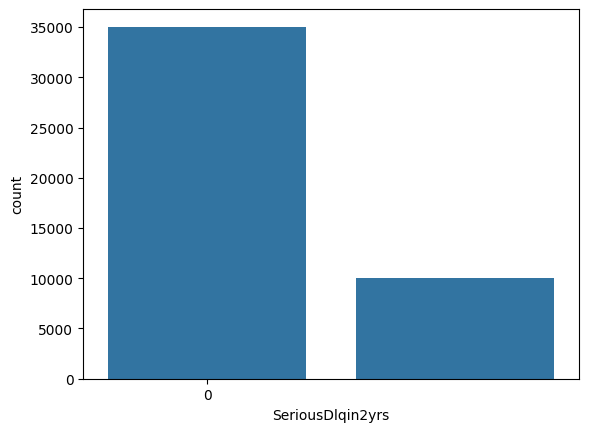

In [ ]:
data_distribution('SeriousDlqin2yrs')

In [ ]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

In [ ]:
X.head()

,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,64,0,0.249908,0,0,8158.0,0.0
1,58,0,3870.000000,0,0,median,0.0
2,41,0,0.456127,0,0,6666.0,0.0
3,43,0,0.000190,0,0,10500.0,2.0
4,49,0,0.271820,0,0,400.0,0.0


In [ ]:
def get_bootstrap_samples(data, n_samples):
  indices = np.random.randint(0, len(data), (n_samples, len(data)))
  samples = data.values[indices]
  return samples

In [ ]:
delayers = df[df['SeriousDlqin2yrs'] == 1]['age']
not_delayes = df[df['SeriousDlqin2yrs'] == 1]['age']

In [ ]:
np.random.seed(0)

In [ ]:
delayers_mean_ages = [np.mean(age) for age in get_bootstrap_samples(delayers, 100)]

In [ ]:
np.percentile(delayers_mean_ages, [5, 95])

array([45.6995013 , 46.14090864])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
lr = LogisticRegression(random_state=5, class_weight="balanced")

In [ ]:
parameters = {"C": (0.0001, 0.001, 0.01, 0.1, 1, 10)}

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [ ]:
lr_grid = GridSearchCV(estimator=lr, param_grid=parameters, scoring='roc_auc', cv=skf)

In [ ]:
median_income = X.loc[X['MonthlyIncome'] != 'median', 'MonthlyIncome'].median()
X.loc[X['MonthlyIncome'] == 'median', 'MonthlyIncome'] = median_income
X.loc[X['NumberOfDependents'] == 'median', 'NumberOfDependents'] = X.loc[X['NumberOfDependents'] != 'median', 'MonthlyIncome'].median()

In [ ]:
X['MonthlyIncome'] = X['MonthlyIncome'].astype(float)
X['NumberOfDependents'] = X['NumberOfDependents'].astype(float)

In [ ]:
lr_grid.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=5),
             param_grid={'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)},
             scoring='roc_auc')

In [ ]:
lr_grid.best_params_

{'C': 0.001}

In [ ]:
lr_grid.best_score_

0.795906288905547

In [ ]:
lr = LogisticRegression(C=0.001, random_state=5)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit_transform(X)

array([[ 0.87289113, -0.12143243, -0.14257696, ..., -0.08220789,
         0.17167558, -0.16041195],
       [ 0.46337311, -0.12143243,  1.4256924 , ..., -0.08220789,
        -0.09140726, -0.16041195],
       [-0.69692794, -0.12143243, -0.14249339, ..., -0.08220789,
         0.04048588, -0.16041195],
       ...,
       [-0.90168695, -0.12143243, -0.1424854 , ..., -0.08220789,
        -0.28186095, -0.15792152],
       [-0.28740992,  0.04026338, -0.14248161, ..., -0.08220789,
         0.48487781, -0.15418586],
       [-0.42391593,  0.20195918, -0.14235282, ..., -0.08220789,
         0.25626305, -0.15792152]])

In [ ]:
lr.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001, random_state=5)

In [ ]:
pd.DataFrame(lr.coef_[0], index=X.columns).abs().sort_values(0, ascending=False)

,0
NumberOfTime30-59DaysPastDueNotWorse,0.397968
NumberOfTime60-89DaysPastDueNotWorse,0.320763
NumberOfTimes90DaysLate,0.140576
age,0.027265
NumberOfDependents,0.000045
MonthlyIncome,0.000022
DebtRatio,0.000017
